In [2]:
import numpy as np
from scipy import fftpack
import dateutil
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [64]:
df = pd.read_csv('Final_temp_can.csv', sep=";") 

In [65]:
df.head()

,date,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T14,T15,T16,T17,T18,T19,T20,T21,Tmean,sd
0,1901-01-16,-17.2,-17.2,-18.1,-18.9,-19.0,-18.9,-18.0,-18.2,-17.8,...,-17.9,-17.7,-16.3,-17.6,-17.4,-17.1,-17.3,-17.5,-17.790476,0.625570
1,1901-01-16,-18.1,-17.9,-18.8,-19.4,-19.7,-19.2,-18.0,-17.9,-18.1,...,-18.2,-18.1,-17.9,-18.1,-18.0,-18.0,-18.1,-18.1,-18.371429,0.507227
2,1901-01-16,-18.5,-18.8,-19.6,-20.2,-20.7,-20.2,-19.3,-18.3,-18.8,...,-18.4,-18.2,-18.2,-18.2,-18.8,-18.5,-18.7,-18.9,-18.933333,0.684059
3,1901-01-16,-19.4,-19.8,-20.3,-20.5,-20.8,-20.3,-19.5,-18.5,-19.3,...,-18.9,-19.0,-18.7,-18.6,-19.1,-19.2,-19.0,-19.6,-19.385714,0.636423
4,1901-01-16,-20.6,-20.7,-21.1,-20.8,-20.7,-19.8,-20.2,-19.4,-19.9,...,-19.8,-19.7,-19.7,-19.4,-19.4,-19.3,-19.9,-20.1,-20.000000,0.497613


In [66]:
df['date'] = df['date'].apply(dateutil.parser.parse, dayfirst=True)

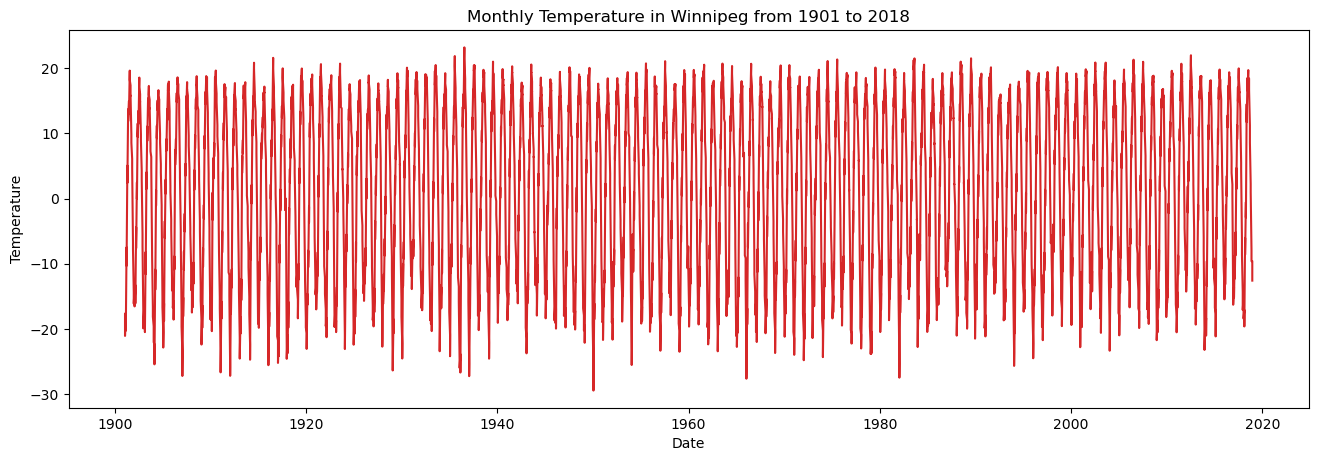

In [68]:
# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()


In [69]:
df.head()

,date,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T16,T17,T18,T19,T20,T21,Tmean,sd,year,month
0,1901-01-16,-17.2,-17.2,-18.1,-18.9,-19.0,-18.9,-18.0,-18.2,-17.8,...,-16.3,-17.6,-17.4,-17.1,-17.3,-17.5,-17.790476,0.625570,1901,Jan
1,1901-01-16,-18.1,-17.9,-18.8,-19.4,-19.7,-19.2,-18.0,-17.9,-18.1,...,-17.9,-18.1,-18.0,-18.0,-18.1,-18.1,-18.371429,0.507227,1901,Jan
2,1901-01-16,-18.5,-18.8,-19.6,-20.2,-20.7,-20.2,-19.3,-18.3,-18.8,...,-18.2,-18.2,-18.8,-18.5,-18.7,-18.9,-18.933333,0.684059,1901,Jan
3,1901-01-16,-19.4,-19.8,-20.3,-20.5,-20.8,-20.3,-19.5,-18.5,-19.3,...,-18.7,-18.6,-19.1,-19.2,-19.0,-19.6,-19.385714,0.636423,1901,Jan
4,1901-01-16,-20.6,-20.7,-21.1,-20.8,-20.7,-19.8,-20.2,-19.4,-19.9,...,-19.7,-19.4,-19.4,-19.3,-19.9,-20.1,-20.000000,0.497613,1901,Jan


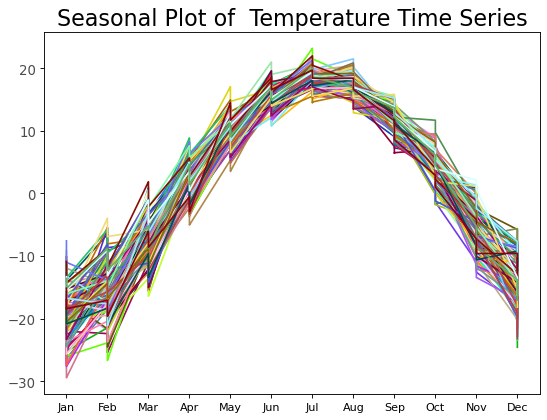

In [70]:
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(8,6), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'Tmean', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        #plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'Tmean'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration

plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of  Temperature Time Series", fontsize=20)
plt.show()

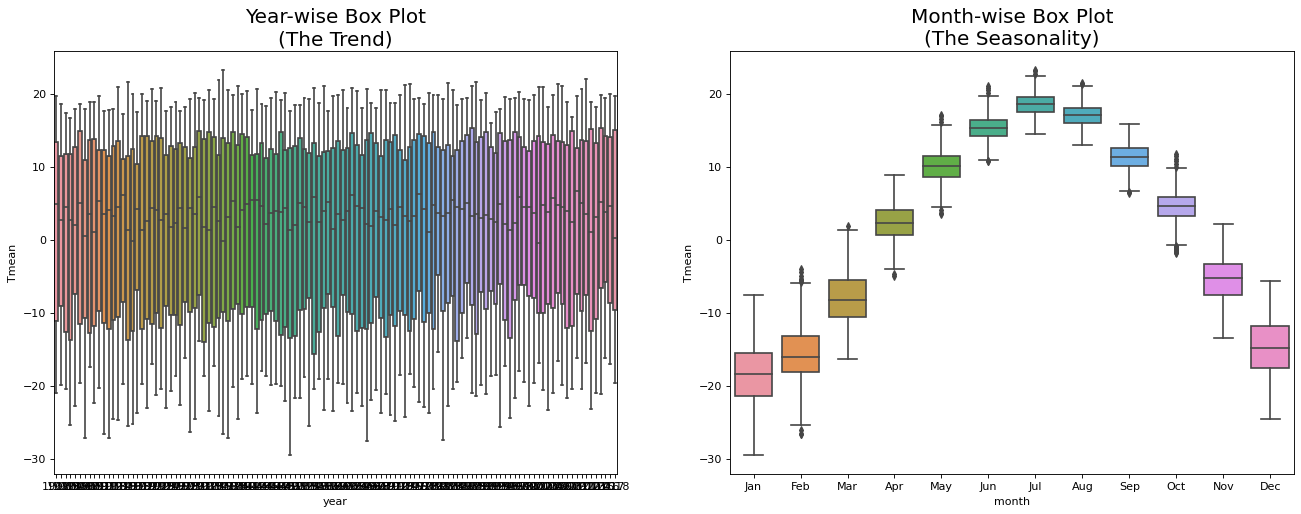

In [71]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Tmean', data=df, ax=axes[0])
sns.boxplot(x='month', y='Tmean', data=df.loc[~df.year.isin([2008, 2018]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

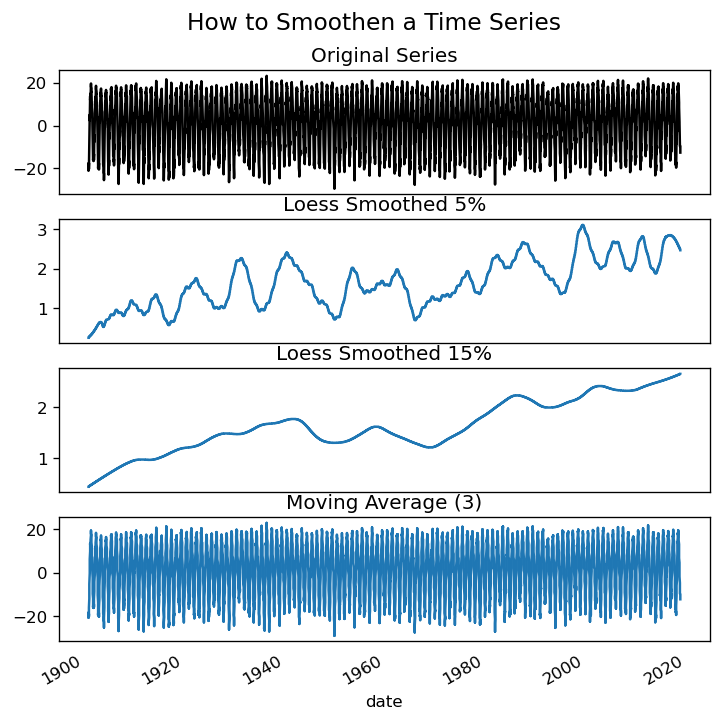

In [75]:
#smoothen a time series
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})
df = pd.read_csv('Final_temp_can.csv', sep=";",  parse_dates=['date'], index_col='date') 

# 1. Moving Average

df_ma = df.Tmean.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df.Tmean, np.arange(len(df.Tmean)), frac=0.05)[:, 1], index=df.index, columns=['Tmean'])
df_loess_15 = pd.DataFrame(lowess(df.Tmean, np.arange(len(df.Tmean)), frac=0.15)[:, 1], index=df.index, columns=['Tmean'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df['Tmean'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['Tmean'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['Tmean'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

Text(0.5, 1.0, 'Temperature detrended by subtracting the least squares fit')

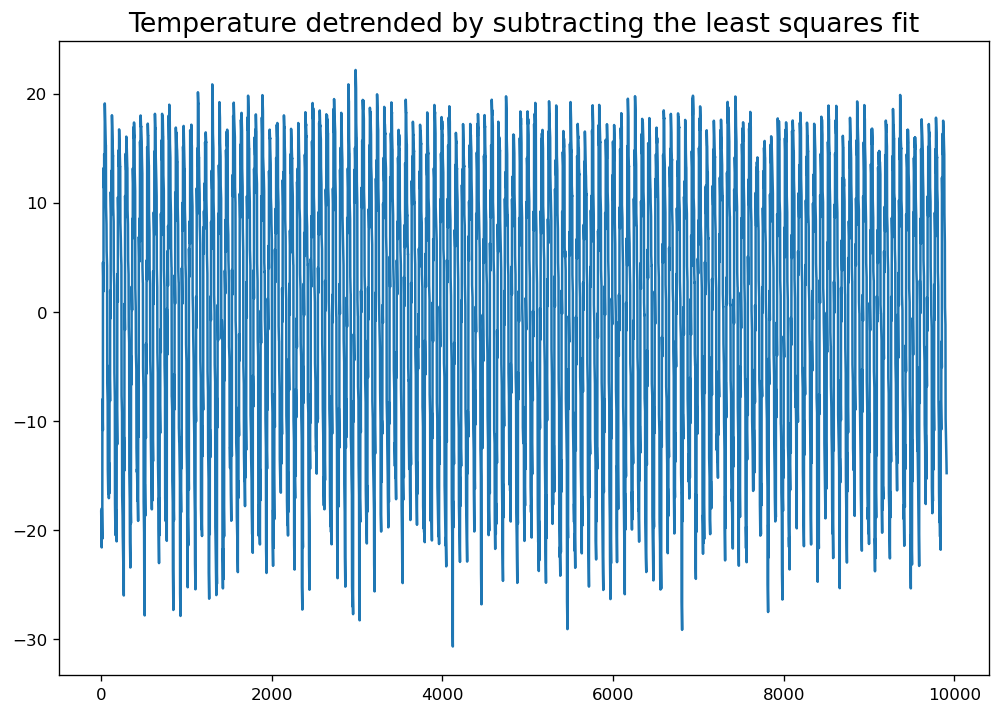

In [11]:
from scipy import signal
df = pd.read_csv('Final_temp_can.csv', sep =";", parse_dates=['date'])
detrended = signal.detrend(df.Tmean.values)
plt.plot(detrended)
plt.title('Temperature detrended by subtracting the least squares fit', fontsize=16)